<a href="https://colab.research.google.com/github/HyunJW/Log_Analystic/blob/lee_feat/%EB%85%B8%EC%9D%B8%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib as mpl
#`7-21



In [75]:
import pandas as pd

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [76]:
# def fix_font():
#   import os
#   import matplotlib as mpl
#   import matplotlib.pyplot as plt
#   os.system("apt-get install -y fonts-nanum")
#   os.system("fc-cache -fv")
#   mpl.font_manager._rebuild()
#   findfont=mpl.font_manager.fontManager.findfont
#   mpl.font_manager.findfont=findfont
#   mpl.backends.backend_agg.findfont=findfont
#   plt.rcParams["font.family"]="NanumBarunGothic"
#   plt.rcParams["axes.unicode_minus"] = False


# fix_font()

In [141]:
dfsub=pd.read_csv("./무임승차_대상별_현황_2016-2021.csv", encoding="cp949")

In [142]:
dfho=pd.read_csv("./서울시 지하철 호선별 역별 유_무임 승하차 인원 정보.csv", encoding="cp949")

In [143]:
dfsub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 61 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   운영기관별(1)  18 non-null     object
 1   2016      18 non-null     object
 2   2016.1    18 non-null     object
 3   2016.2    18 non-null     object
 4   2016.3    18 non-null     object
 5   2016.4    18 non-null     object
 6   2016.5    18 non-null     object
 7   2016.6    18 non-null     object
 8   2016.7    18 non-null     object
 9   2016.8    18 non-null     object
 10  2016.9    18 non-null     object
 11  2017      18 non-null     object
 12  2017.1    18 non-null     object
 13  2017.2    18 non-null     object
 14  2017.3    18 non-null     object
 15  2017.4    18 non-null     object
 16  2017.5    18 non-null     object
 17  2017.6    18 non-null     object
 18  2017.7    18 non-null     object
 19  2017.8    18 non-null     object
 20  2017.9    18 non-null     object
 21  2018      18 non-n

In [144]:
dfho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     57394 non-null  int64 
 1   호선명     57394 non-null  object
 2   지하철역    57394 non-null  object
 3   유임승차인원  57394 non-null  int64 
 4   무임승차인원  57394 non-null  int64 
 5   유임하차인원  57394 non-null  int64 
 6   무임하차인원  57394 non-null  int64 
 7   작업일자    57394 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 3.5+ MB


In [145]:
dfho.head()

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,202212,1호선,서울역,1350791,196523,1316828,187268,20230103
1,202212,1호선,시청,672846,96623,665583,93198,20230103
2,202212,1호선,종각,975925,150911,949944,141309,20230103
3,202212,1호선,종로3가,490967,309071,450017,287432,20230103
4,202212,1호선,종로5가,476315,247835,470710,238588,20230103


In [146]:
dfsub.head()

,운영기관별(1),2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,...,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,...,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
1,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),...,무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
2,합계,431540,564065,345012,450692,80733,105766,5500,7233,296,...,380197,510236,315412,423193,60463,81260,3855,5168,467,615
3,서울교통공사,-,-,-,-,-,-,-,-,-,...,205748,278438,170771,231108,32868,44477,2109,2853,-,-
4,서울메트로,151738,206478,121979,165984,27736,37741,2023,2753,-,...,-,-,-,-,-,-,-,-,-,-


In [147]:
# 누락값 처리
dfsub = dfsub.replace({'-': 0}, regex=True)

In [148]:
dfsub.columns

Index(['운영기관별(1)', '2016', '2016.1', '2016.2', '2016.3', '2016.4', '2016.5',
       '2016.6', '2016.7', '2016.8', '2016.9', '2017', '2017.1', '2017.2',
       '2017.3', '2017.4', '2017.5', '2017.6', '2017.7', '2017.8', '2017.9',
       '2018', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5', '2018.6',
       '2018.7', '2018.8', '2018.9', '2019', '2019.1', '2019.2', '2019.3',
       '2019.4', '2019.5', '2019.6', '2019.7', '2019.8', '2019.9', '2020',
       '2020.1', '2020.2', '2020.3', '2020.4', '2020.5', '2020.6', '2020.7',
       '2020.8', '2020.9', '2021', '2021.1', '2021.2', '2021.3', '2021.4',
       '2021.5', '2021.6', '2021.7', '2021.8', '2021.9'],
      dtype='object')

In [149]:
dfsub.head()

,운영기관별(1),2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,...,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,...,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
1,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),...,무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
2,합계,431540,564065,345012,450692,80733,105766,5500,7233,296,...,380197,510236,315412,423193,60463,81260,3855,5168,467,615
3,서울교통공사,0,0,0,0,0,0,0,0,0,...,205748,278438,170771,231108,32868,44477,2109,2853,0,0
4,서울메트로,151738,206478,121979,165984,27736,37741,2023,2753,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
# 컬럼명 변경
dfsub.rename(columns = {'운영기관별(1)':'운영기관별'}, inplace = True)

In [151]:
# 필요한 컬럼만 추출
df_total_pop=dfsub[["운영기관별","2017","2018","2019","2020","2021"]]

In [152]:
df_total_pop

,운영기관별,2017,2018,2019,2020,2021
0,운영기관별(1),계,계,계,계,계
1,운영기관별(1),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명)
2,합계,0,465831,497095,358371,380197
3,서울교통공사,258250,261047,273841,195690,205748
4,서울메트로,0,0,0,0,0
5,서울특별시 도시철도공사,0,0,0,0,0
6,서울메트로 9호선(주),12440,12824,13750,9900,10682
7,서울교통공사9호선운영부문,1350,1668,4319,3353,3789
8,부산교통공사,93418,95673,102235,76634,80009
9,대구도시철도공사,43796,45559,49140,33314,36742


In [153]:
# 2017년도 합계 계산
df_total_pop["2017"][2:3]=df_total_pop["2017"].iloc[3:].astype(float).sum().astype(int)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\416962822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_pop["2017"][2:3]=df_total_pop["2017"].iloc[3:].astype(float).sum().astype(int)


In [154]:
df_total_pop

,운영기관별,2017,2018,2019,2020,2021
0,운영기관별(1),계,계,계,계,계
1,운영기관별(1),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명)
2,합계,452783,465831,497095,358371,380197
3,서울교통공사,258250,261047,273841,195690,205748
4,서울메트로,0,0,0,0,0
5,서울특별시 도시철도공사,0,0,0,0,0
6,서울메트로 9호선(주),12440,12824,13750,9900,10682
7,서울교통공사9호선운영부문,1350,1668,4319,3353,3789
8,부산교통공사,93418,95673,102235,76634,80009
9,대구도시철도공사,43796,45559,49140,33314,36742


In [155]:
# 무임승차자 중 노인
df_old_pop=dfsub[["운영기관별","2016.2","2017.2","2018.2","2019.2","2020.2","2021.2"]]

In [156]:
df_old_pop

,운영기관별,2016.2,2017.2,2018.2,2019.2,2020.2,2021.2
0,운영기관별(1),노인,노인,노인,노인,노인,노인
1,운영기관별(1),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명)
2,합계,345012,0,380263,408946,293476,315412
3,서울교통공사,0,208466,212843,225094,160053,170771
4,서울메트로,121979,0,0,0,0,0
5,서울특별시 도시철도공사,81162,0,0,0,0,0
6,서울메트로 9호선(주),9337,9746,10156,11024,7863,8655
7,서울교통공사9호선운영부문,987,1103,1387,3559,2724,3118
8,부산교통공사,72059,77631,79920,85759,64212,67718
9,대구도시철도공사,33297,36211,37933,41228,27784,30933


In [157]:
# 2017.2 합계 계산
df_old_pop["2017.2"][2:3]=df_old_pop["2017.2"].iloc[3:].astype(float).sum().astype(int)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\2722339324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_pop["2017.2"][2:3]=df_old_pop["2017.2"].iloc[3:].astype(float).sum().astype(int)


In [158]:
df_old_pop

,운영기관별,2016.2,2017.2,2018.2,2019.2,2020.2,2021.2
0,운영기관별(1),노인,노인,노인,노인,노인,노인
1,운영기관별(1),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명)
2,합계,345012,366191,380263,408946,293476,315412
3,서울교통공사,0,208466,212843,225094,160053,170771
4,서울메트로,121979,0,0,0,0,0
5,서울특별시 도시철도공사,81162,0,0,0,0,0
6,서울메트로 9호선(주),9337,9746,10156,11024,7863,8655
7,서울교통공사9호선운영부문,987,1103,1387,3559,2724,3118
8,부산교통공사,72059,77631,79920,85759,64212,67718
9,대구도시철도공사,33297,36211,37933,41228,27784,30933


In [159]:
# 무임승차자ㅏ 중 장애인
df_disab_pop=dfsub[["운영기관별","2016.4","2017.4","2018.4","2019.4","2020.4","2021.4"]]

In [160]:
# 2017.4 합계 계산
df_disab_pop["2017.4"][2:3]=df_disab_pop["2017.4"].iloc[3:].astype(float).sum().astype(int)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\568917337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disab_pop["2017.4"][2:3]=df_disab_pop["2017.4"].iloc[3:].astype(float).sum().astype(int)


In [161]:
df_disab_pop

,운영기관별,2016.4,2017.4,2018.4,2019.4,2020.4,2021.4
0,운영기관별(1),장애인,장애인,장애인,장애인,장애인,장애인
1,운영기관별(1),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명)
2,합계,80733,80854,79858,82325,60612,60463
3,서울교통공사,0,46405,44967,45644,33460,32868
4,서울메트로,27736,0,0,0,0,0
5,서울특별시 도시철도공사,20278,0,0,0,0,0
6,서울메트로 9호선(주),2534,2529,2508,2546,1888,1877
7,서울교통공사9호선운영부문,226,228,252,580,459,485
8,부산교통공사,14535,14854,14717,15374,11611,11502
9,대구도시철도공사,7034,7180,7224,7509,5268,5540


In [162]:
# 무임승차자 중 국가유공자
df_honour_pop=dfsub[["운영기관별","2016.6","2017.6","2018.6","2019.6","2020.6","2021.6"]]

In [163]:
# 2017.6 합계 계산
df_honour_pop["2017.6"][2:3]=df_honour_pop["2017.6"].iloc[3:].astype(float).sum().astype(int)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\892370743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_honour_pop["2017.6"][2:3]=df_honour_pop["2017.6"].iloc[3:].astype(float).sum().astype(int)


In [164]:
df_honour_pop

,운영기관별,2016.6,2017.6,2018.6,2019.6,2020.6,2021.6
0,운영기관별(1),국가유공자,국가유공자,국가유공자,국가유공자,국가유공자,국가유공자
1,운영기관별(1),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명)
2,합계,5500,5422,5392,5497,3918,3855
3,서울교통공사,0,3379,3237,3103,2177,2109
4,서울메트로,2023,0,0,0,0,0
5,서울특별시 도시철도공사,1473,0,0,0,0,0
6,서울메트로 9호선(주),166,165,160,180,133,133
7,서울교통공사9호선운영부문,18,19,29,180,170,186
8,부산교통공사,963,934,1036,1102,811,789
9,대구도시철도공사,394,405,402,403,262,269


In [165]:
# 무임승차자 중 기타
df_other_pop=dfsub[["운영기관별","2016.8","2017.8","2018.8","2019.8","2020.8","2021.8"]]

In [166]:
# 2017.8 합계 계산
df_other_pop["2017.8"][2:3]=df_other_pop["2017.8"].iloc[3:].astype(float).sum().astype(int)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\864156794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other_pop["2017.8"][2:3]=df_other_pop["2017.8"].iloc[3:].astype(float).sum().astype(int)


In [167]:
df_other_pop

,운영기관별,2016.8,2017.8,2018.8,2019.8,2020.8,2021.8
0,운영기관별(1),기타,기타,기타,기타,기타,기타
1,운영기관별(1),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명)
2,합계,296,317,318,327,365,467
3,서울교통공사,0,0,0,0,0,0
4,서울메트로,0,0,0,0,0,0
5,서울특별시 도시철도공사,0,0,0,0,0,0
6,서울메트로 9호선(주),0,0,0,0,16,17
7,서울교통공사9호선운영부문,2,0,0,0,0,0
8,부산교통공사,0,0,0,0,0,0
9,대구도시철도공사,0,0,0,0,0,0


In [168]:
# 모든 무임승차자 수
df_total_pop_tot=df_total_pop[2:3]
df_total_pop_tot[df_total_pop_tot["운영기관별"]=="합계"]
df_total_pop_tot.columns=["대상자","2017","2018","2019","2020","2021"]
df_total_pop_tot["대상자"]="전체"
df_total_pop_tot

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\1435215211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_pop_tot["대상자"]="전체"


,대상자,2017,2018,2019,2020,2021
2,전체,452783,465831,497095,358371,380197


In [169]:
# 노인 무임승차자 수
df_old_pop_tot=df_old_pop[2:3]
df_old_pop_tot[df_old_pop_tot["운영기관별"]=="합계"]
df_old_pop_tot.columns=["대상자","2016","2017","2018","2019","2020","2021"]
df_old_pop_tot["대상자"]="노인"
df_old_pop_tot

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\1381292261.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_pop_tot["대상자"]="노인"


,대상자,2016,2017,2018,2019,2020,2021
2,노인,345012,366191,380263,408946,293476,315412


In [170]:
# 장애인 무임승차자 수
df_disab_pop_tot=df_disab_pop[2:3]
df_disab_pop_tot[df_disab_pop_tot["운영기관별"]=="합계"]
df_disab_pop_tot.columns=["대상자","2016","2017","2018","2019","2020","2021"]
df_disab_pop_tot["대상자"]="장애인"
df_disab_pop_tot

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\1487882451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disab_pop_tot["대상자"]="장애인"


,대상자,2016,2017,2018,2019,2020,2021
2,장애인,80733,80854,79858,82325,60612,60463


In [171]:
# 유공자 무임승차자 수
df_honour_pop_tot=df_honour_pop[2:3]
df_honour_pop_tot[df_honour_pop_tot["운영기관별"]=="합계"]
df_honour_pop_tot.columns=["대상자","2016","2017","2018","2019","2020","2021"]
df_honour_pop_tot["대상자"]="유공자"
df_honour_pop_tot

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\2380755658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_honour_pop_tot["대상자"]="유공자"


,대상자,2016,2017,2018,2019,2020,2021
2,유공자,5500,5422,5392,5497,3918,3855


In [172]:
# 기타 무임승차자 수
df_other_pop_tot=df_other_pop[2:3]
df_other_pop_tot[df_other_pop_tot["운영기관별"]=="합계"]
df_other_pop_tot.columns=["대상자","2016","2017","2018","2019","2020","2021"]
df_other_pop_tot["대상자"]="기타"
df_other_pop_tot

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\2052234661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other_pop_tot["대상자"]="기타"


,대상자,2016,2017,2018,2019,2020,2021
2,기타,296,317,318,327,365,467


In [173]:
# 대상별 무임승차자 수 결합
newdf=pd.concat([df_total_pop_tot,df_old_pop_tot,df_disab_pop_tot, df_honour_pop_tot,df_other_pop_tot], ignore_index=True)
newdf.set_index("대상자", inplace=True)
newdf

,2017,2018,2019,2020,2021,2016
대상자,,,,,,
전체,452783,465831,497095,358371,380197,NaN
노인,366191,380263,408946,293476,315412,345012
장애인,80854,79858,82325,60612,60463,80733
유공자,5422,5392,5497,3918,3855,5500
기타,317,318,327,365,467,296


In [174]:
newdf=newdf.drop(columns=['2016'])

In [175]:
newdf.astype("int")

,2017,2018,2019,2020,2021
대상자,,,,,
전체,452783,465831,497095,358371,380197
노인,366191,380263,408946,293476,315412
장애인,80854,79858,82325,60612,60463
유공자,5422,5392,5497,3918,3855
기타,317,318,327,365,467


In [176]:
newchart=newdf[1:]

In [177]:
# 데이터 리스트화
total=newdf.iloc[0][0:].values.tolist()
old=newdf.iloc[1][0:].values.tolist()
disabled=newdf.iloc[2][0:].values.tolist()
honored=newdf.iloc[3][0:].values.tolist()
others=newdf.iloc[4][0:].values.tolist()

In [178]:
total = [ int(x) for x in total ]
old = [ int(x) for x in old ]
disabled = [ int(x) for x in disabled ]
honored = [ int(x) for x in honored ]
others = [ int(x) for x in others ]

In [179]:
totallist=newdf[:1]
totallist

,2017,2018,2019,2020,2021
대상자,,,,,
전체,452783,465831,497095,358371,380197


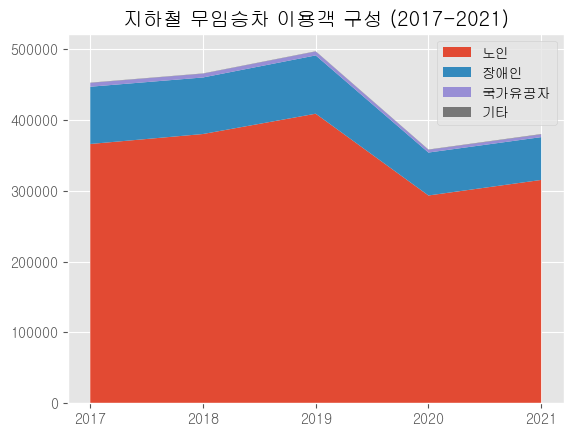

In [180]:
# plot bars in stack manner
plt.style.use('ggplot')
x = ["2017", "2018", "2019", "2020", "2021"]
y1 = total
y2 = old
y3 = disabled
y4 = honored
y5 = others
y = np.vstack([y2, y3, y4,y5])

# plot
fig, ax = plt.subplots()

ax.stackplot(x, y)
# plt.annotate("annotate",(2.2,0.5))

plt.legend(('노인','장애인','국가유공자','기타'))
plt.title('지하철 무임승차 이용객 구성 (2017-2021)')



plt.show()

In [181]:
dfho.호선명.unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '신림선', '안산선', '우이신설선', '일산선', '장항선', '중앙선',
       '9호선2단계'], dtype=object)

In [182]:
dfho.replace(["9호선2~3단계",'9호선2단계'],'9호선', inplace=True)
dfho

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,202212,1호선,서울역,1350791,196523,1316828,187268,20230103
1,202212,1호선,시청,672846,96623,665583,93198,20230103
2,202212,1호선,종각,975925,150911,949944,141309,20230103
3,202212,1호선,종로3가,490967,309071,450017,287432,20230103
4,202212,1호선,종로5가,476315,247835,470710,238588,20230103
...,...,...,...,...,...,...,...,...
57389,201501,9호선,노량진,817907,864989,114416,119275,20150206
57390,201501,9호선,사평,70919,67069,14085,13931,20150206
57391,201501,9호선,노들,121496,100670,27470,25964,20150206
57392,201501,9호선,가양,469127,439698,107695,104082,20150206


In [183]:
dfho.호선명.unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선', '분당선',
       '수인선', '신림선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'], dtype=object)

In [184]:
dfho["사용월"].unique()

array([202212, 202211, 202210, 202209, 202208, 202207, 202206, 202205,
       202204, 202203, 202202, 202201, 202112, 202111, 202110, 202109,
       202108, 202107, 202106, 202105, 202104, 202103, 202102, 202101,
       202012, 202011, 202010, 202009, 202008, 202007, 202006, 202005,
       202004, 202003, 202002, 202001, 201912, 201911, 201910, 201909,
       201908, 201907, 201906, 201905, 201904, 201903, 201902, 201901,
       201812, 201811, 201810, 201809, 201808, 201807, 201806, 201805,
       201804, 201803, 201802, 201801, 201712, 201711, 201710, 201709,
       201708, 201707, 201706, 201705, 201704, 201703, 201702, 201701,
       201612, 201611, 201610, 201609, 201608, 201607, 201606, 201605,
       201604, 201603, 201602, 201601, 201512, 201511, 201510, 201509,
       201508, 201507, 201506, 201505, 201504, 201503, 201502, 201501],
      dtype=int64)

In [185]:
# 유임승차자 데이터 분리
yoo=dfho.pivot_table(index ="사용월",
                       columns ="호선명",
                       values="유임승차인원",
                       aggfunc ="sum",
                       margins=True)

In [186]:
# 무임승차자 데이터 분리
moo=dfho.pivot_table(index ="사용월",
                       columns ="호선명",
                       values="무임승차인원",
                       aggfunc ="sum",
                       margins=True)

In [187]:
yoo.head()

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,...,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선,All
사용월,,,,,,,,,,,,,,,,,,,,,
201501,7061728.0,41566862.0,14050458.0,15106583.0,14583902.0,8239130.0,18377360.0,3932104.0,6621245.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129539372
201502,6049221.0,35565700.0,12165689.0,13124560.0,12504315.0,7123746.0,15863493.0,3383307.0,5641118.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111421149
201503,7045187.0,44134790.0,15001487.0,16750650.0,15857733.0,9417641.0,20256825.0,4329797.0,7088629.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139882739
201504,6756467.0,42709626.0,14649721.0,16364674.0,15817718.0,9212033.0,19779014.0,4292558.0,7958350.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137540161
201505,6793349.0,41948087.0,14514902.0,16457439.0,15289097.0,9308495.0,19396060.0,4204366.0,7547910.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135459705


In [205]:
yoo_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     97 non-null     object
 1   All     97 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [248]:
yoo_month=pd.DataFrame(yoo.All).reset_index()
yoo_month["연도"]=yoo_month["사용월"].astype(str).map(lambda x:x[0:4])
yoo_month["사용월"]=yoo_month["사용월"].astype(str).map(lambda x:x[4:])

yoo_month

,사용월,All,연도
0,01,129539372,2015
1,02,111421149,2015
2,03,139882739,2015
3,04,137540161,2015
4,05,135459705,2015
...,...,...,...
92,09,159600343,2022
93,10,168714729,2022
94,11,169505454,2022
95,12,171869332,2022


In [249]:
yoo_month.rename(columns = {'All':'유임승차'}, inplace = True)
yoo_month

,사용월,유임승차,연도
0,01,129539372,2015
1,02,111421149,2015
2,03,139882739,2015
3,04,137540161,2015
4,05,135459705,2015
...,...,...,...
92,09,159600343,2022
93,10,168714729,2022
94,11,169505454,2022
95,12,171869332,2022


In [290]:
yoo

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,...,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선,All
사용월,,,,,,,,,,,,,,,,,,,,,
201501,7061728.0,4.156686e+07,1.405046e+07,1.510658e+07,1.458390e+07,8239130.0,1.837736e+07,3932104.0,6621245.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129539372
201502,6049221.0,3.556570e+07,1.216569e+07,1.312456e+07,1.250432e+07,7123746.0,1.586349e+07,3383307.0,5641118.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111421149
201503,7045187.0,4.413479e+07,1.500149e+07,1.675065e+07,1.585773e+07,9417641.0,2.025682e+07,4329797.0,7088629.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139882739
201504,6756467.0,4.270963e+07,1.464972e+07,1.636467e+07,1.581772e+07,9212033.0,1.977901e+07,4292558.0,7958350.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137540161
201505,6793349.0,4.194809e+07,1.451490e+07,1.645744e+07,1.528910e+07,9308495.0,1.939606e+07,4204366.0,7547910.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135459705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202209,4580938.0,3.280496e+07,1.174236e+07,1.107715e+07,1.429360e+07,7824760.0,1.365684e+07,4088730.0,8907187.0,786911.0,...,2371546.0,8506784.0,1411181.0,742971.0,2976630.0,880727.0,2357568.0,429356.0,2116586.0,159600343
202210,5016726.0,3.476239e+07,1.255854e+07,1.190929e+07,1.505100e+07,8349283.0,1.407360e+07,4338108.0,9362341.0,823523.0,...,2579510.0,8868232.0,1492473.0,807925.0,3118413.0,919282.0,2493604.0,438133.0,2209653.0,168714729
202211,5033249.0,3.525118e+07,1.263427e+07,1.202378e+07,1.518271e+07,8075618.0,1.443465e+07,4415543.0,9533997.0,821691.0,...,2500993.0,9029056.0,1460453.0,837165.0,3075153.0,923051.0,2457708.0,437019.0,2181518.0,169505454


In [292]:
yoo.ho=yoo.iloc[96:]
yoo.ho

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,...,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선,All
사용월,,,,,,,,,,,,,,,,,,,,,
All,551550094.0,3.715756e+09,1.291679e+09,1.331388e+09,1.430004e+09,818610998.0,1.684307e+09,419787367.0,803332800.0,52656670.0,...,243744100.0,807985188.0,100797321.0,5538047.0,295614716.0,53352778.0,227559840.0,30867707.0,200241870.0,16864097593


In [251]:
moo_month=pd.DataFrame(moo.All).reset_index()
moo_month["연도"]=moo_month["사용월"].astype(str).map(lambda x:x[0:4])
moo_month["사용월"]=moo_month["사용월"].astype(str).map(lambda x:x[4:])
        
moo_month.rename(columns = {'All':'무임승차'}, inplace = True)
moo_month

,사용월,무임승차,연도
0,01,129258016,2015
1,02,111164477,2015
2,03,139689950,2015
3,04,137364173,2015
4,05,135375585,2015
...,...,...,...
92,09,33070795,2022
93,10,36360764,2022
94,11,34887255,2022
95,12,34304151,2022


In [293]:
moo.ho=moo.iloc[96:]
moo.ho

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,...,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선,All
사용월,,,,,,,,,,,,,,,,,,,,,
All,244149418.0,871187547.0,379722046.0,395123233.0,417084867.0,237520002.0,455491233.0,126591864.0,188723101.0,9614634.0,...,55999960.0,195538358.0,28472123.0,1961596.0,61959441.0,26076832.0,73910145.0,10795737.0,67786934.0,4566644522


In [253]:
yoo_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     97 non-null     object
 1   유임승차    97 non-null     int64 
 2   연도      97 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [254]:
yearlyyoomoo=pd.concat([yoo_month, moo_month.iloc[:,1]], axis=1) # column bind

In [268]:
yearlyyoomoo=yearlyyoomoo[['연도','사용월','유임승차','무임승차']]

In [272]:
# 2017~2021 유임승차
a=yearlyyoomoo[["유임승차"]][24:84].sum().values.tolist()

In [273]:
# 2017~2021 무임승차
b=yearlyyoomoo[["무임승차"]][24:84].sum().values.tolist()

In [274]:
listforpie=a+b

In [275]:
listforpie

[10320966873, 1965587561]

In [276]:
yearlyyoomoo=yearlyyoomoo[:][24:84]

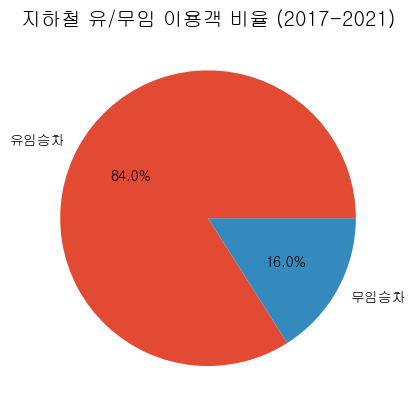

In [277]:
y = np.array(listforpie)
mylabels = ["유임승차","무임승차"]
plt.title('지하철 유/무임 이용객 비율 (2017-2021)')
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.show() 

In [278]:
yearlyyoomoo.head()

,연도,사용월,유임승차,무임승차
24,2017,01,175326077,30176247
25,2017,02,174019866,30916591
26,2017,03,201040233,36139071
27,2017,04,192550272,35230418
28,2017,05,192154255,35682085


In [279]:
yearlyyoomoonewnew=yearlyyoomoo.groupby(by=["연도"]).sum()
yearlyyoomoonewnew

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\889559551.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearlyyoomoonewnew=yearlyyoomoo.groupby(by=["연도"]).sum()


,유임승차,무임승차
연도,,
2017,2236677884,409775569
2018,2443568819,454440806
2019,2315157972,450792842
2020,1652983971,315383439
2021,1672578227,335194905


In [940]:
yearlyyoomoo
yearlyyoomoo2=yearlyyoomoo.reset_index()
yearlyyoomoo3=yearlyyoomoo2.drop(['연도'], axis=1)
yearlyyoomoo4=yearlyyoomoo3.drop(['사용월'], axis=1)
yearlyyoomoo4.iloc[0]

유임승차    174339519
무임승차     30080083
Name: 0, dtype: int64

In [941]:
yearlyyoomoo4.iloc[0].tolist()

[174339519, 30080083]

In [942]:
#연도별 유/무임 이용객 비율
yoonum=yearlyyoomoo["유임승차"][:70].values.tolist()
moonum=yearlyyoomoo["무임승차"][:70].values.tolist()

In [943]:
yearlyyoomoonewnew

,유임승차,무임승차
연도,,
2017,2223982775,408423307
2018,2428262528,452645346
2019,2288897153,446469612
2020,1631307974,312026888
2021,1649343765,331401634


In [280]:
yearlyyoomoonewnew["무임승차비율"]=(yearlyyoomoonewnew["무임승차"]/(yearlyyoomoonewnew["유임승차"]+yearlyyoomoonewnew["무임승차"])*100).round(1)
yearlyyoomoonewnew["유임승차비율"]=(yearlyyoomoonewnew["유임승차"]/(yearlyyoomoonewnew["유임승차"]+yearlyyoomoonewnew["무임승차"])*100).round(1)


In [281]:
yearlyyoomoonewnew

,유임승차,무임승차,무임승차비율,유임승차비율
연도,,,,
2017,2236677884,409775569,15.5,84.5
2018,2443568819,454440806,15.7,84.3
2019,2315157972,450792842,16.3,83.7
2020,1652983971,315383439,16.0,84.0
2021,1672578227,335194905,16.7,83.3


In [287]:
yearlyyoomoonewnew.reset_index(inplace=True)
forplotting1=yearlyyoomoonewnew[["유임승차","무임승차"]]
forplotting2=yearlyyoomoonewnew[["연도","유임승차비율","무임승차비율"]]
#forplotting2.set_index(["연도"], inplace=True)

Text(0.5, 1.0, '지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')

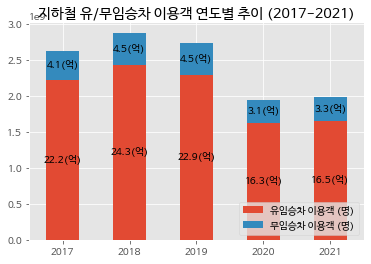

In [961]:
ax = yearlyyoomoonewnew[["유임승차","무임승차"]].plot.bar(stacked=True)
ax.set_xticklabels(['2017', '2018',"2019","2020","2021"])

x = ['2017', '2018',"2019","2020","2021"]

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}(억)'.format(height/100000000), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xticks(rotation = 0)

plt.legend(['유임승차 이용객 (명)',"무임승차 이용객 (명)"], loc='lower right')
plt.title('지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')



Text(0.5, 1.0, '지하철 유/무임승차 이용객 비율 (2017-2021)')

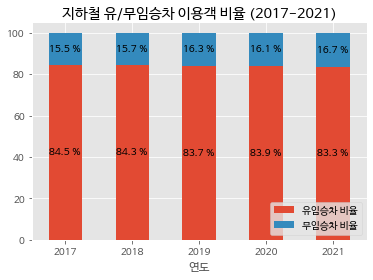

In [962]:
ax = forplotting2.plot.bar(stacked=True)
x = ['2017', '2018',"2019","2020","2021"]

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xticks(rotation = 0)
plt.legend(['유임승차 비율',"무임승차 비율"], loc='lower right')
plt.title('지하철 유/무임승차 이용객 비율 (2017-2021)')



In [294]:
hodf = pd.concat([yoo.ho,moo.ho])
hodf

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,...,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선,All
사용월,,,,,,,,,,,,,,,,,,,,,
All,551550094.0,3.715756e+09,1.291679e+09,1.331388e+09,1.430004e+09,818610998.0,1.684307e+09,419787367.0,803332800.0,52656670.0,...,243744100.0,807985188.0,100797321.0,5538047.0,295614716.0,53352778.0,227559840.0,30867707.0,200241870.0,16864097593
All,244149418.0,8.711875e+08,3.797220e+08,3.951232e+08,4.170849e+08,237520002.0,4.554912e+08,126591864.0,188723101.0,9614634.0,...,55999960.0,195538358.0,28472123.0,1961596.0,61959441.0,26076832.0,73910145.0,10795737.0,67786934.0,4566644522


In [295]:
hodf.reset_index(drop=True, inplace=True)
hodf=hodf.transpose()
hodf

,0,1
호선명,,
1호선,5.515501e+08,2.441494e+08
2호선,3.715756e+09,8.711875e+08
3호선,1.291679e+09,3.797220e+08
4호선,1.331388e+09,3.951232e+08
5호선,1.430004e+09,4.170849e+08
6호선,8.186110e+08,2.375200e+08
7호선,1.684307e+09,4.554912e+08
8호선,4.197874e+08,1.265919e+08
9호선,8.033328e+08,1.887231e+08


In [296]:
hodf=hodf[:-1]

In [297]:
hodf["무임승차비율"]=hodf.iloc[:][1]/(hodf.iloc[:][0]+hodf.iloc[:][1])*100

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\533262614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hodf["무임승차비율"]=hodf.iloc[:][1]/(hodf.iloc[:][0]+hodf.iloc[:][1])*100


In [298]:
hodf["유임승차비율"]=hodf.iloc[:][0]/(hodf.iloc[:][0]+hodf.iloc[:][1])*100

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\454945953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hodf["유임승차비율"]=hodf.iloc[:][0]/(hodf.iloc[:][0]+hodf.iloc[:][1])*100


In [299]:
hodf

,0,1,무임승차비율,유임승차비율
호선명,,,,
1호선,5.515501e+08,244149418.0,30.683620,69.316380
2호선,3.715756e+09,871187547.0,18.992768,81.007232
3호선,1.291679e+09,379722046.0,22.718789,77.281211
4호선,1.331388e+09,395123233.0,22.885651,77.114349
5호선,1.430004e+09,417084867.0,22.580655,77.419345
6호선,8.186110e+08,237520002.0,22.489635,77.510365
7호선,1.684307e+09,455491233.0,21.286645,78.713355
8호선,4.197874e+08,126591864.0,23.169231,76.830769
9호선,8.033328e+08,188723101.0,19.023434,80.976566


In [977]:
hodfr=hodf

In [978]:
hodfr

,0,1,무임승차비율,유임승차비율
호선명,,,,
1호선,5.515501e+08,244149418.0,30.683620,69.316380
2호선,3.715756e+09,871187547.0,18.992768,81.007232
3호선,1.291679e+09,379722046.0,22.718789,77.281211
4호선,1.331388e+09,395123233.0,22.885651,77.114349
5호선,1.430004e+09,417084867.0,22.580655,77.419345
6호선,8.186110e+08,237520002.0,22.489635,77.510365
7호선,1.684307e+09,455491233.0,21.286645,78.713355
8호선,4.197874e+08,126591864.0,23.169231,76.830769
9호선,6.556763e+08,163756216.0,19.984100,80.015900


In [301]:
hodf=hodf.transpose()

In [302]:
hodf.columns

Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선', '분당선', '수인선',
       '신림선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype='object', name='호선명')

In [303]:
hodf["1호선"]=hodf["1호선"]+hodf["경원선"]+hodf["경인선"]+hodf["경부선"]+hodf["장항선"]+hodf['공항철도 1호선']
hodf.drop(columns=['경원선', '경인선','경부선','장항선',"공항철도 1호선"], inplace=True)

In [304]:
hodf["3호선"]=hodf["3호선"]+hodf["일산선"]
hodf.drop(columns=['일산선'], inplace=True)

In [305]:
hodf["4호선"]=hodf["4호선"]+hodf["안산선"]+hodf["과천선"]
hodf.drop(columns=['안산선', '과천선'], inplace=True)

In [306]:
hodf.columns

Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선'],
      dtype='object', name='호선명')

In [307]:
hodf_yoo=hodf.iloc[0].tolist()
hodf_yoo

[3072775974.0,
 3715756076.0,
 1519238738.0,
 1870746379.0,
 1430004432.0,
 818610998.0,
 1684306876.0,
 419787367.0,
 803332800.0,
 52656670.0,
 230512639.0,
 78453440.0,
 807985188.0,
 100797321.0,
 5538047.0,
 53352778.0,
 200241870.0]

In [308]:
hodf

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,경의선,경춘선,분당선,수인선,신림선,우이신설선,중앙선
0,3.072776e+09,3.715756e+09,1.519239e+09,1.870746e+09,1.430004e+09,8.186110e+08,1.684307e+09,4.197874e+08,8.033328e+08,5.265667e+07,2.305126e+08,7.845344e+07,8.079852e+08,1.007973e+08,5.538047e+06,5.335278e+07,2.002419e+08
1,8.842636e+08,8.711875e+08,4.536322e+08,5.130826e+08,4.170849e+08,2.375200e+08,4.554912e+08,1.265919e+08,1.887231e+08,9.614634e+06,6.020558e+07,2.941145e+07,1.955384e+08,2.847212e+07,1.961596e+06,2.607683e+07,6.778693e+07
무임승차비율,1.351679e+02,1.899277e+01,4.723537e+01,5.889596e+01,2.258066e+01,2.248963e+01,2.128665e+01,2.316923e+01,1.902343e+01,1.543991e+01,2.070925e+01,2.726693e+01,1.948518e+01,2.202541e+01,2.615586e+01,3.283011e+01,2.529091e+01
유임승차비율,4.648321e+02,8.100723e+01,1.527646e+02,2.411040e+02,7.741934e+01,7.751037e+01,7.871335e+01,7.683077e+01,8.097657e+01,8.456009e+01,7.929075e+01,7.273307e+01,8.051482e+01,7.797459e+01,7.384414e+01,6.716989e+01,7.470909e+01


In [309]:
hodf[2:4]

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,경의선,경춘선,분당선,수인선,신림선,우이신설선,중앙선
무임승차비율,135.167905,18.992768,47.235373,58.895961,22.580655,22.489635,21.286645,23.169231,19.023434,15.439911,20.709255,27.266933,19.485179,22.025408,26.155858,32.830115,25.290914
유임승차비율,464.832095,81.007232,152.764627,241.104039,77.419345,77.510365,78.713355,76.830769,80.976566,84.560089,79.290745,72.733067,80.514821,77.974592,73.844142,67.169885,74.709086


In [310]:
hodf_moo=hodf.iloc[1].tolist()
hodf_moo

[884263583.0,
 871187547.0,
 453632191.0,
 513082634.0,
 417084867.0,
 237520002.0,
 455491233.0,
 126591864.0,
 188723101.0,
 9614634.0,
 60205576.0,
 29411447.0,
 195538358.0,
 28472123.0,
 1961596.0,
 26076832.0,
 67786934.0]

In [311]:
hosun=['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선']

In [312]:
hodf.replace(['9호선2~3단계','9호선2단계'], '9호선')
hodf=hodf[:2]

In [313]:
hodf["승차유형"]=["유임승차","무임승차"]

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8692\2175130433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hodf["승차유형"]=["유임승차","무임승차"]


In [314]:
hodf.set_index("승차유형")

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,경의선,경춘선,분당선,수인선,신림선,우이신설선,중앙선
승차유형,,,,,,,,,,,,,,,,,
유임승차,3.072776e+09,3.715756e+09,1.519239e+09,1.870746e+09,1.430004e+09,818610998.0,1.684307e+09,419787367.0,803332800.0,52656670.0,230512639.0,78453440.0,807985188.0,100797321.0,5538047.0,53352778.0,200241870.0
무임승차,8.842636e+08,8.711875e+08,4.536322e+08,5.130826e+08,4.170849e+08,237520002.0,4.554912e+08,126591864.0,188723101.0,9614634.0,60205576.0,29411447.0,195538358.0,28472123.0,1961596.0,26076832.0,67786934.0


In [315]:
hodf=hodf.transpose()
hodf=hodf[:-1]

In [316]:
hodf

,0,1
호선명,,
1호선,3072775974.0,884263583.0
2호선,3715756076.0,871187547.0
3호선,1519238738.0,453632191.0
4호선,1870746379.0,513082634.0
5호선,1430004432.0,417084867.0
6호선,818610998.0,237520002.0
7호선,1684306876.0,455491233.0
8호선,419787367.0,126591864.0
9호선,803332800.0,188723101.0


In [317]:
hodf3=hodf

In [318]:
hodf.iloc[:][1]

호선명
1호선      884263583.0
2호선      871187547.0
3호선      453632191.0
4호선      513082634.0
5호선      417084867.0
6호선      237520002.0
7호선      455491233.0
8호선      126591864.0
9호선      188723101.0
경강선        9614634.0
경의선       60205576.0
경춘선       29411447.0
분당선      195538358.0
수인선       28472123.0
신림선        1961596.0
우이신설선     26076832.0
중앙선       67786934.0
Name: 1, dtype: object

In [319]:
hodf["무임승차비율"]=hodf.iloc[:][1]/(hodf.iloc[:][0]+hodf.iloc[:][1])*100
hodf["유임승차비율"]=hodf.iloc[:][0]/(hodf.iloc[:][0]+hodf.iloc[:][1])*100

In [320]:
hodf.index

Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선'],
      dtype='object', name='호선명')

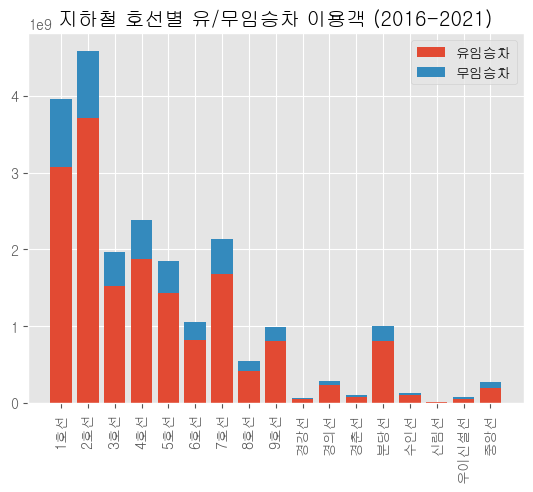

In [321]:

# create data
plt.style.use('ggplot')




plt.title('지하철 호선별 유/무임승차 이용객 (2016-2021)')
# plot bars in stack manner
plt.bar(hosun, hodf_yoo,  label="유임승차")
plt.bar(hosun, hodf_moo, bottom=hodf_yoo, label="무임승차")


plt.legend(['유임승차', '무임승차'])
plt.xticks(rotation = 90)




plt.show()

In [322]:
hoho=hodf[["무임승차비율","유임승차비율"]].round(1)
hoho

,무임승차비율,유임승차비율
호선명,,
1호선,22.346594,77.653406
2호선,18.992768,81.007232
3호선,22.993506,77.006494
4호선,21.523466,78.476534
5호선,22.580655,77.419345
6호선,22.489635,77.510365
7호선,21.286645,78.713355
8호선,23.169231,76.830769
9호선,19.023434,80.976566


In [323]:
hodf3=hodf.drop(['무임승차비율', '유임승차비율'], axis=1)
hodf3

,0,1
호선명,,
1호선,3072775974.0,884263583.0
2호선,3715756076.0,871187547.0
3호선,1519238738.0,453632191.0
4호선,1870746379.0,513082634.0
5호선,1430004432.0,417084867.0
6호선,818610998.0,237520002.0
7호선,1684306876.0,455491233.0
8호선,419787367.0,126591864.0
9호선,803332800.0,188723101.0


Text(0.5, 1.0, '지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')

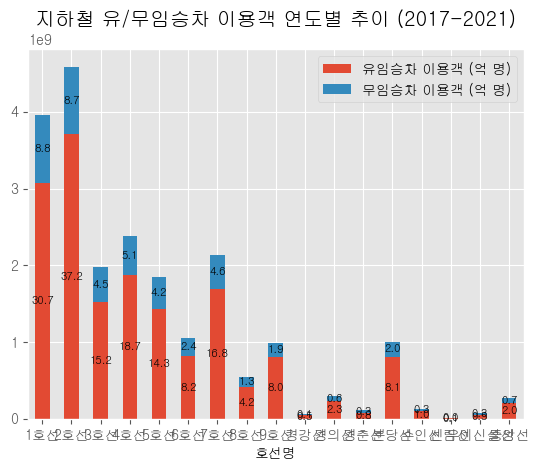

In [324]:
ax = hodf3.plot.bar(stacked=True)

ax.set_xticklabels(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선'])

x = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선']


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height/100000000), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=8)
plt.xticks(rotation = 0)

plt.legend(['유임승차 이용객 (억 명)',"무임승차 이용객 (억 명)"], loc='upper right')
plt.title('지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')



Text(0.5, 1.0, '지하철 호선별 유/무임승차 비율 (2017-2021)')

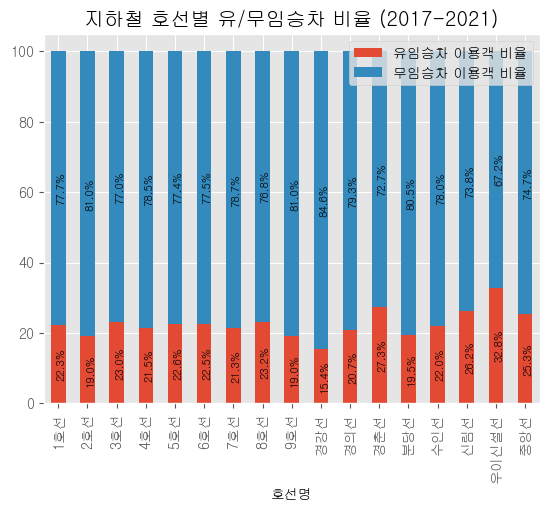

In [325]:
ax = hoho.plot.bar(stacked=True)
ax.set_xticklabels(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선'])

x = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선']

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2+0.1, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            rotation = 90,
            fontsize=8)
plt.xticks(rotation = 90)

plt.legend(['유임승차 이용객 비율',"무임승차 이용객 비율"], loc='upper right')
plt.title('지하철 호선별 유/무임승차 비율 (2017-2021)')


**시각화종합**

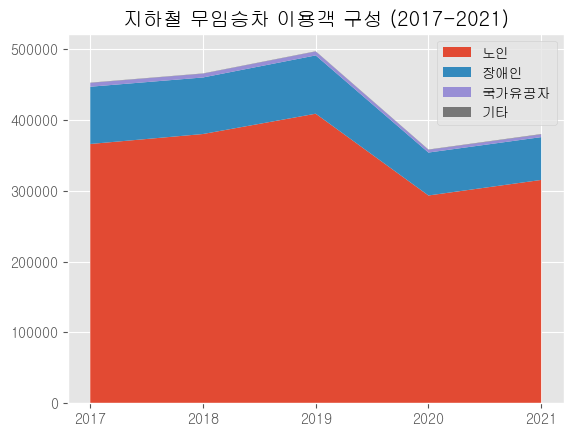

In [282]:
# plot bars in stack manner
plt.style.use('ggplot')
x = ["2017", "2018", "2019", "2020", "2021"]
y1 = total
y2 = old
y3 = disabled
y4 = honored
y5 = others
y = np.vstack([y2, y3, y4,y5])

# plot
fig, ax = plt.subplots()

ax.stackplot(x, y)
# plt.annotate("annotate",(2.2,0.5))

plt.legend(('노인','장애인','국가유공자','기타'))
plt.title('지하철 무임승차 이용객 구성 (2017-2021)')



plt.show()

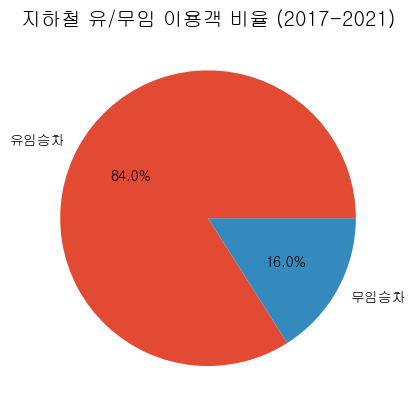

In [283]:
y = np.array(listforpie)
mylabels = ["유임승차","무임승차"]
plt.title('지하철 유/무임 이용객 비율 (2017-2021)')
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.show() 

Text(0.5, 1.0, '지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')

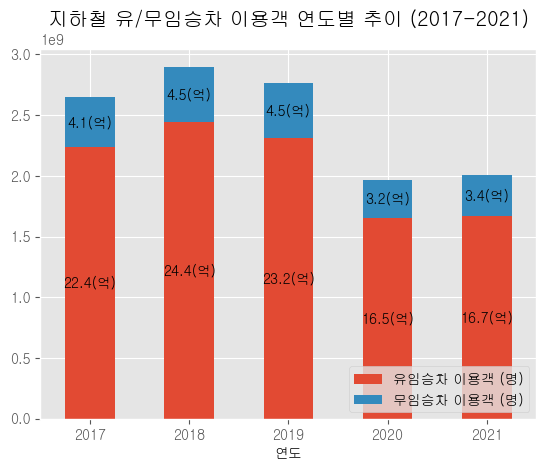

In [284]:
ax = yearlyyoomoonewnew[["유임승차","무임승차"]].plot.bar(stacked=True)
ax.set_xticklabels(['2017', '2018',"2019","2020","2021"])

x = ['2017', '2018',"2019","2020","2021"]

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}(억)'.format(height/100000000), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xticks(rotation = 0)

plt.legend(['유임승차 이용객 (명)',"무임승차 이용객 (명)"], loc='lower right')
plt.title('지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')



Text(0.5, 1.0, '지하철 유/무임승차 이용객 비율 (2017-2021)')

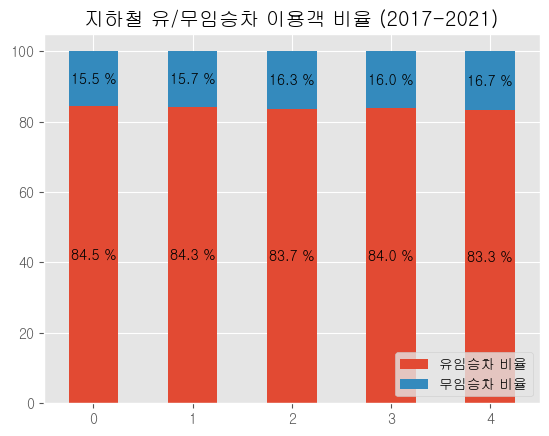

In [288]:
ax = forplotting2.plot.bar(stacked=True)
x = ['2017', '2018',"2019","2020","2021"]

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xticks(rotation = 0)
plt.legend(['유임승차 비율',"무임승차 비율"], loc='lower right')
plt.title('지하철 유/무임승차 이용객 비율 (2017-2021)')



Text(0.5, 1.0, '지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')

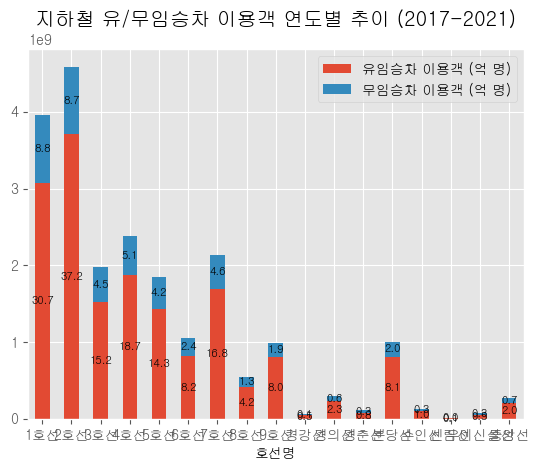

In [326]:
ax = hodf3.plot.bar(stacked=True)

ax.set_xticklabels(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선'])

x = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선']


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height/100000000), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=8)
plt.xticks(rotation = 0)

plt.legend(['유임승차 이용객 (억 명)',"무임승차 이용객 (억 명)"], loc='upper right')
plt.title('지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')



Text(0.5, 1.0, '지하철 호선별 유/무임승차 비율 (2017-2021)')

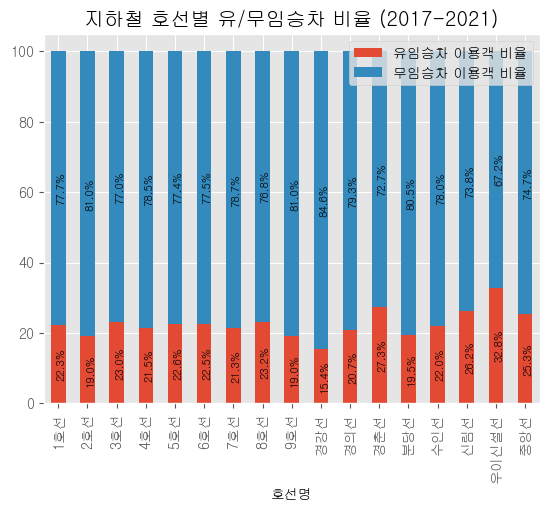

In [327]:
ax = hoho.plot.bar(stacked=True)
ax.set_xticklabels(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선'])

x = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선']

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2+0.1, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            rotation = 90,
            fontsize=8)
plt.xticks(rotation = 90)

plt.legend(['유임승차 이용객 비율',"무임승차 이용객 비율"], loc='upper right')
plt.title('지하철 호선별 유/무임승차 비율 (2017-2021)')
